 file main dùng để đánh giá test, vẽ hình, ...

In [1]:
import pickle
from Tunning import Tunning
import pickle
from Tiger_LSTM import Tiger
from PrepareData import *
import torch

path_params = 'Data/best_hyperparams.pkl'

# Lưu trữ từ điển
with open(path_params, 'rb') as f:
    best_params = pickle.load(f)

print(best_params)

{'hidden_dim': 128, 'dropout': 0.3304288413840223, 'num_layers': 1, 'bidirectional': False, 'batch_size': 2, 'learning_rate': 0.01546677559621527, 'gammar': 0.05336652334967718}


In [2]:

tiger = Tiger(None,best_params['hidden_dim'],best_params['dropout'],best_params['num_layers'],best_params['bidirectional'],best_params['batch_size'],best_params['learning_rate'],best_params['gammar'])
train_loss ,val_loss,_ = tiger.train(earlystop_train = True)
print(train_loss ,val_loss,_)
accuracy, y_trues, y_scores, y_preds = tiger.test()
print(f"Accuracy: {accuracy}")
print(tiger.predict("I love this"))

c:\Users\PC\miniconda3\envs\manhtms1\lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3304288413840223 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[tensor(0.5043), tensor(0.4158), tensor(0.3782), tensor(0.3703), tensor(0.3825), tensor(0.3903), tensor(0.3749), tensor(0.3863), tensor(0.3708)] [tensor(0.4494), tensor(0.4632), tensor(0.4644), tensor(0.4644), tensor(0.4644), tensor(0.4644), tensor(0.4644), tensor(0.4644), tensor(0.4644)] [0.7676767676767676, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576]
Accuracy: 0.82

(0.9468818306922913, 'positive')


In [3]:
from sklearn.metrics import f1_score, recall_score, precision_score


# Tính F1-score
f1 = f1_score(y_trues, y_preds)

# Tính recall
recall = recall_score(y_trues, y_preds)

# Tính precision
precision = precision_score(y_trues, y_preds)

print("F1-score:", f1)
print("Recall:", recall)
print("Precision:", precision)

F1-score: 0.8548387096774193
Recall: 0.9636363636363636
Precision: 0.7681159420289855


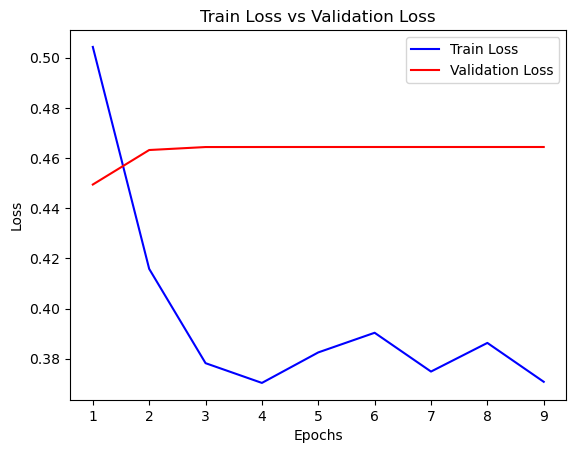

In [4]:
import matplotlib.pyplot as plt


epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

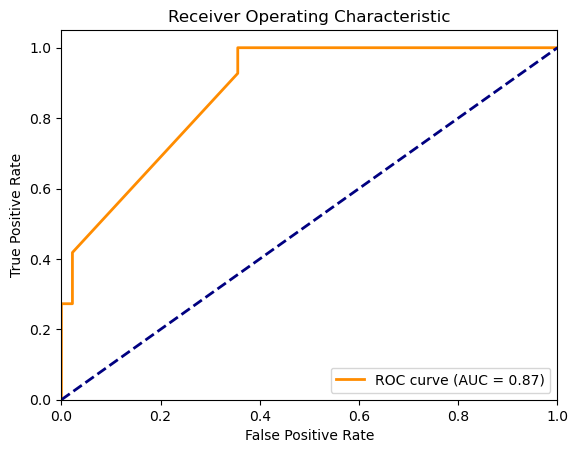

In [5]:
from sklearn.metrics import roc_curve, auc

# Tính false positive rate (FPR), true positive rate (TPR) và ngưỡng (thresholds)
fpr, tpr, thresholds = roc_curve(y_trues, y_scores)

# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# hết